In [2]:
import pandas as pd 
import numpy as np 

df=pd.read_csv("ReadySoilDataset_Final.csv")
df.head()   


,Region,Year,Month,SoilTemperature-10,SoilTemperature-30,SoilTemperature-50,Rainfall,Temperature,Min Temperature,Max Temperature,Humidity,Sunshine,Wind Speed,Surface Pressure,Solar Radiation
0,0,2001,1,17.89,19.85,19.94,0.0,17.08,10.13,25.71,80.48,8.92,2.24,101281.92,207.58
1,0,2001,2,21.95,22.76,22.13,64.0,21.82,14.94,29.49,78.07,8.60,2.06,101059.03,214.45
2,0,2001,3,26.32,27.46,26.37,21.0,25.91,19.05,33.12,74.81,8.03,2.22,100912.25,253.59
3,0,2001,4,30.51,31.25,29.97,51.0,28.98,23.57,34.57,75.23,6.84,2.96,100700.03,259.83
4,0,2001,5,30.05,31.21,30.41,244.0,28.28,23.70,32.84,86.23,4.99,2.66,100247.55,187.60


In [3]:
df.describe() 

,Region,Year,Month,SoilTemperature-10,SoilTemperature-30,SoilTemperature-50,Rainfall,Temperature,Min Temperature,Max Temperature,Humidity,Sunshine,Wind Speed,Surface Pressure,Solar Radiation
count,2112.00000,2112.000000,2112.00000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,3.50000,2011.501420,6.50000,27.104446,26.966880,26.914285,156.775663,25.734238,21.373234,30.655265,79.697614,5.893314,2.352874,100635.612476,188.183035
std,2.29183,6.345269,3.45287,4.411259,4.040746,3.745712,171.349679,4.146605,5.115718,3.685783,6.511513,1.856289,0.626735,531.507730,32.477058
min,0.00000,2001.000000,1.00000,16.100000,17.370000,17.640000,0.000000,13.800000,8.360000,3.810000,52.100000,0.000000,1.240000,99332.250000,107.480000
25%,1.75000,2006.000000,3.75000,23.380000,23.510000,23.700000,7.000000,22.672500,17.057500,29.037500,76.430000,4.650000,1.870000,100163.092500,165.470000
50%,3.50000,2011.500000,6.50000,28.930000,28.485000,28.170000,104.000000,27.620000,23.430000,31.820000,80.870000,6.040000,2.200000,100649.595000,180.435000
75%,5.25000,2017.000000,9.25000,30.740000,30.320000,30.030000,261.000000,28.960000,25.912500,32.972500,84.485000,7.270000,2.780000,101105.765000,210.102500
max,7.00000,2022.000000,12.00000,34.130000,33.890000,33.310000,1016.000000,32.100000,30.420000,38.460000,93.840000,20.350000,4.620000,101629.660000,288.600000


Epoch 1/50
53/53 [==============================] - 2s 8ms/step - loss: 0.0922 - val_loss: 0.0181
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.0146
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0076
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0067
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 7/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0053
Epoch 8/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 9/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0059
Epoch 10/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0057
Epoch 11/50
53/53 [

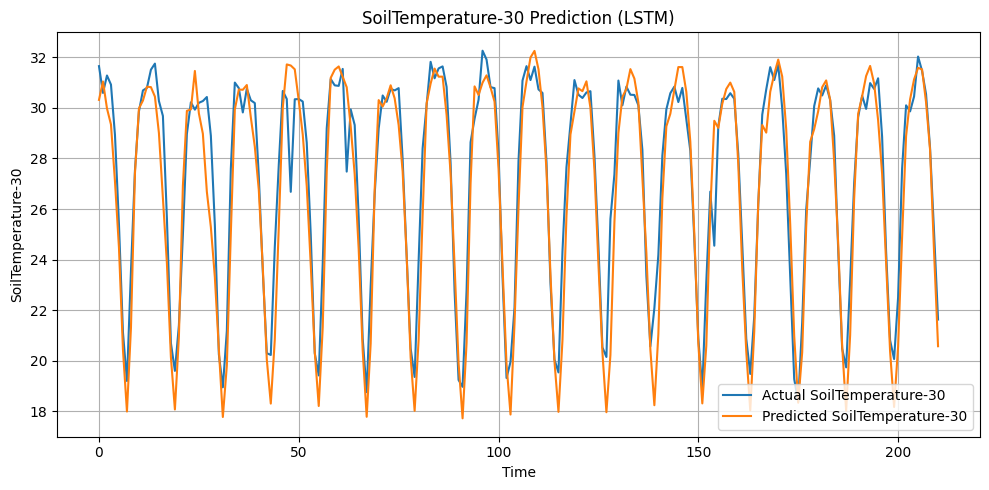

In [7]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math


# Filter regions 2, 4, 5, 7
df = df[df['Region'].isin([2, 4, 5, 7])]

# Sort by Region, Year, Month
df = df.sort_values(by=['Region', 'Year', 'Month'])

# Features and target
features = [ 'Month','Year','Temperature',
            'Min Temperature', 'Max Temperature', 'Humidity', 'Sunshine', 'Solar Radiation']
target = 'SoilTemperature-10'

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

# Create sequences
def create_sequences(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled)


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Accuracy metrics
mse = mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"📊 Accuracy Metrics:")
print(f"• MSE: {mse:.3f}")
print(f"• RMSE: {rmse:.3f}")
print(f"• MAE: {mae:.3f}")
print(f"• R²: {r2:.3f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual SoilTemperature-30')
plt.plot(y_pred, label='Predicted SoilTemperature-30')
plt.title('SoilTemperature-30 Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('SoilTemperature-30')
plt.legend()
plt.grid(True)
plt.tight_layout() 
plt.show() 
